## Problem Statement

 A US bike-sharing provider 'BoomBikes' has suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They specifically want to understand the factors affecting the demand for these shared bikes in the American market. So, Linear Regression model is build to anaysis and give the prediction. 


## Business Objective

BoomBikes wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the      demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands


## IMPORTING NECESSARY LIBRARIES

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')





## Data Sourcing and Understanding the dataset

In [329]:
df = pd.read_csv("data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


| Field      | Description                                                                                   |
|------------|-----------------------------------------------------------------------------------------------|
| instant    | Record index                                                                                  |
| dteday     | Date                                                                                          |
| season     | Season (1:spring, 2:summer, 3:fall, 4:winter)                                                 |
| yr         | Year (0: 2018, 1:2019)                                                                       |
| mnth       | Month (1 to 12)                                                                               |
| holiday    | Indicates whether it's a holiday or not (extracted from DC Government Holiday Schedule) |
| weekday    | Day of the week                                                                               |
| workingday | 1 if the day is neither a weekend nor a holiday, otherwise 0                                  |
| weathersit | Weather situation:                                                                          |
|            |   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                        |
|            |   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                           |
|            |   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|            |   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                             |
| temp       | Temperature in Celsius                                                                        |
| atemp      | Feeling temperature in Celsius                                                                |
| hum        | Humidity                                                                                      |
| windspeed  | Wind speed                                                                                    |
| casual     | Count of casual users                                                                         |
| registered | Count of registered users                                                                     |
| cnt        | Count of total rental bikes including both casual and registered                              |


In [331]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


# DATA PREPROCESSING

In [332]:
#Droping non target variables 

df.drop(["casual","registered"], axis = 1, inplace = True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


In [333]:
# Renaming Columns for better understanding
df.rename(columns = {"yr":"year", "mnth":"month", "hum":"humidity", "cnt":"total_count"}, inplace=True)

In [334]:
# Local Copy
dataset = df.copy()

In [335]:
# Get the number of rows in the dataset
num_rows = dataset.shape[0]
print("Before Dropping Duplicates \n")
print(f"There are '{num_rows}' rows and '{dataset.shape[1]}' columns in our dataset \n")

# Drop duplicate rows from the dataset
dataset.drop_duplicates(inplace=True)

print("\nAfter Dropping Duplicates")
print(f"There are '{dataset.shape[0]}' rows and '{dataset.shape[1]}' columns in our dataset \n")


Before Dropping Duplicates 

There are '730' rows and '14' columns in our dataset 


After Dropping Duplicates
There are '730' rows and '14' columns in our dataset 



# DATA VISUALIZATION

## 1. Pairplot to see relation among variables

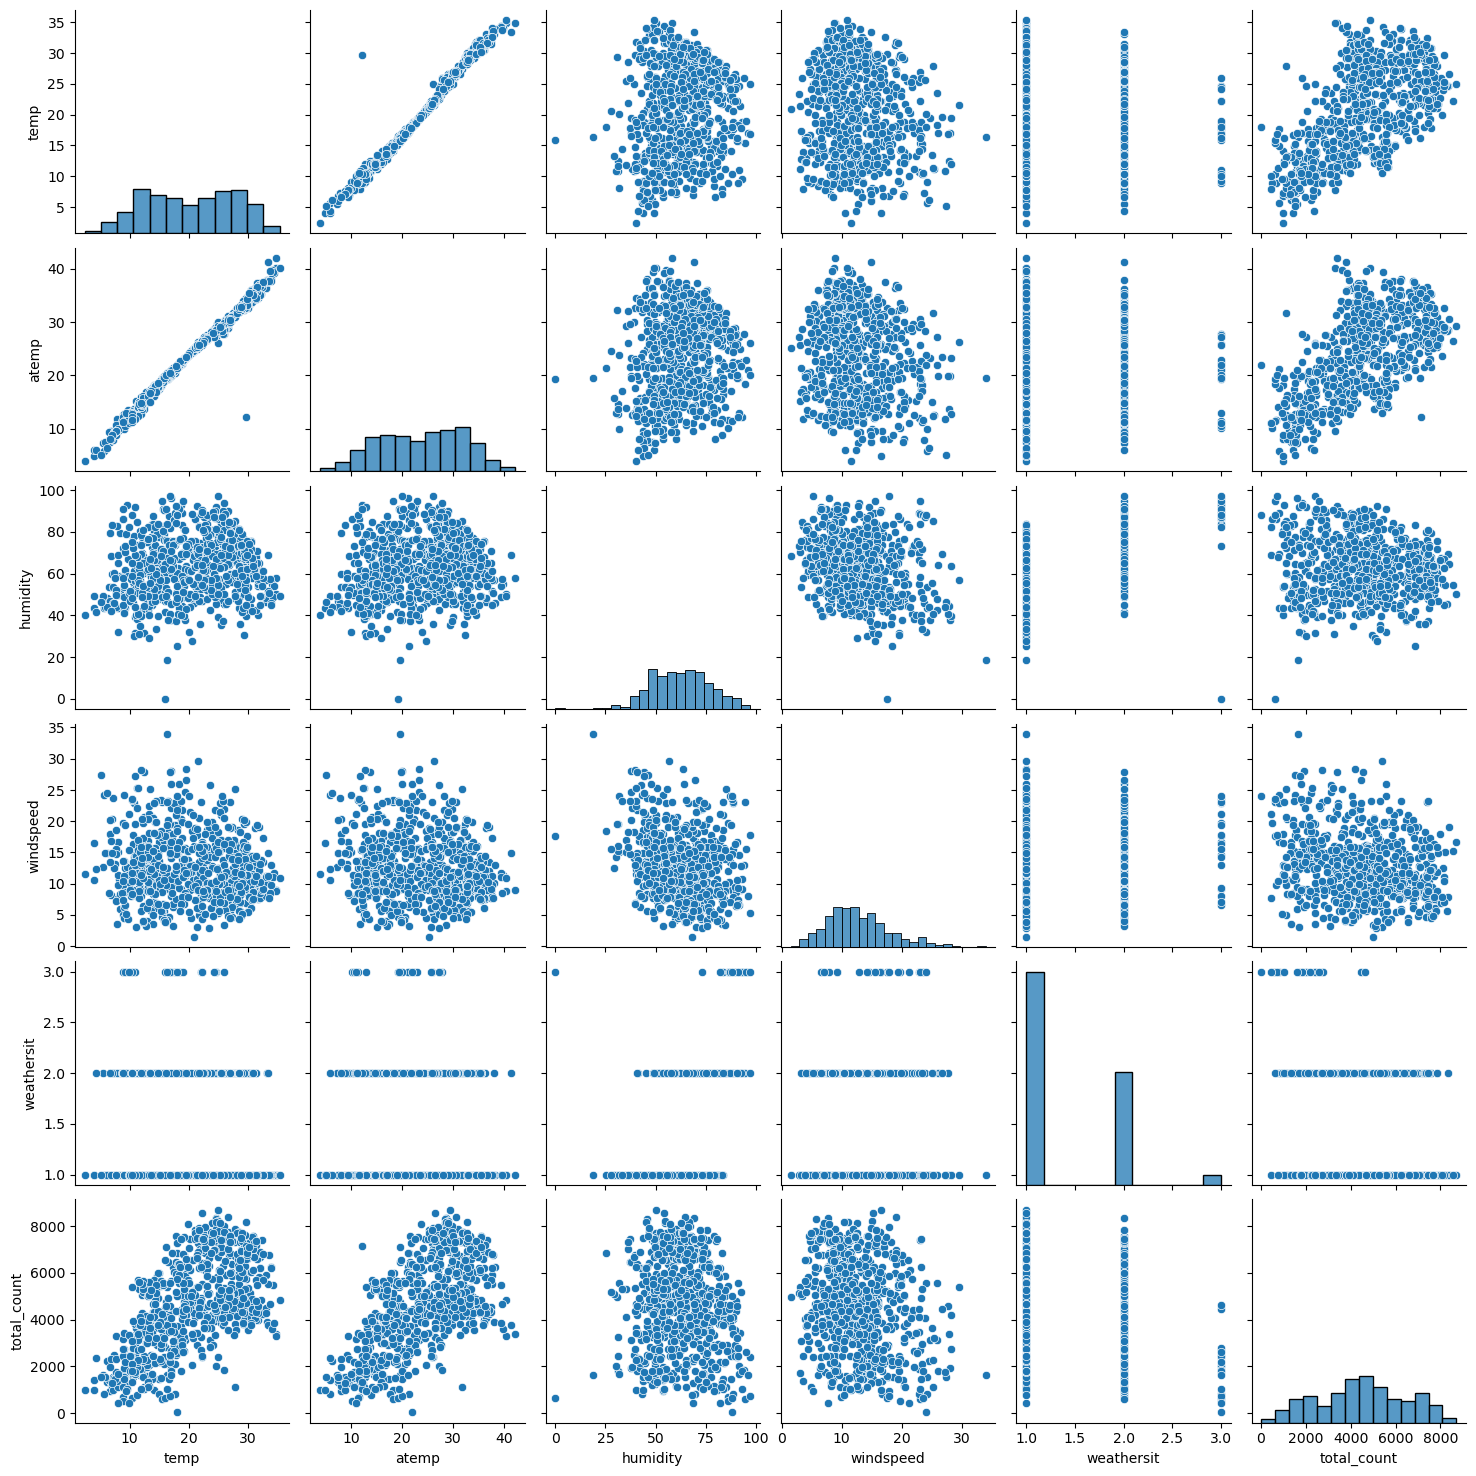

In [336]:
# Scatter plots help us visualize relationships between two variables.
# Here, we're using a pair plot to explore intricacies between different variables.

# Select relevant columns for the pair plot
selected_columns = ["temp", "atemp", "humidity", "windspeed", "weathersit", "total_count"]

# Create a pair plot
sns.pairplot(dataset[selected_columns])

# Display the plot
plt.show()


### OBSERVATION:

1. The relation between `temp` and `atemp` is highly correlated, indicating a linear relationship between them.
2. It can be said that when the humidity is above 40, more people prefer to take rented bikes.
3. People are less likely to rent bikes when the wind speed is above 25.


## 2. Season wise Distribution of total Rentals

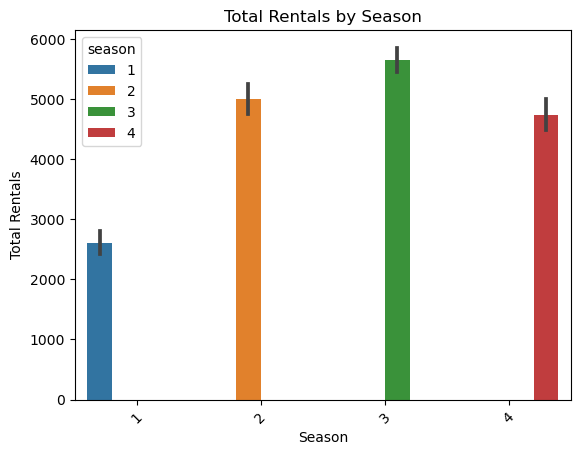

In [337]:
# Assuming 'season' is a string column and 'total_count' is numeric
# Make sure to adjust the column names based on your actual dataset


# If needed, convert 'season' to string (object) type
dataset['season'] = dataset['season'].astype(str)

# Now create the bar plot
sns.barplot(x="season", y="total_count", data=dataset, hue="season")
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by Season')
plt.xticks(rotation=45)
plt.show()


Mapping required variables

In [338]:
#mapping correct values for the column "Season"
season_list = {1:"spring",2:"summer",3:"fall", 4:"winter"}
dataset.season = dataset.season.map(season_list)

In [339]:
#mapping correct values for the column "Year"
dataset["year"] = dataset["year"].map({0:2018, 1:2019})

In [340]:
#mapping correct values for the column "Month"
dataset["month"] = dataset["month"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",\
                                         5:"May", 6:"jun",7:"Jul",8:"Aug",\
                                         9:"Sep", 10:"Oct",11:"Nov",12:"Dec"})

In [341]:
#mapping correct values for the column "Weekday"
dataset["weekday"] = dataset["weekday"].map({0:"sun",1:"mon",2:"tue", 3:"wed", 4:"thr",\
                                             5:"fri",6:"sat"})

In [342]:
#mapping correct values for the column "Weathersit"
dataset["weathersit"] = dataset["weathersit"].map({1:"clear",2:"misty",3:"light snow & rain",\
                                           4:"heavy snow & rain"})

In [343]:
dataset.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,01-01-2018,NaN,2018,Jan,0,sat,0,misty,14.11,18.18,80.58,10.75,985
1,2,02-01-2018,NaN,2018,Jan,0,sun,0,misty,14.90,17.69,69.61,16.65,801
2,3,03-01-2018,NaN,2018,Jan,0,mon,1,clear,8.05,9.47,43.73,16.64,1349
3,4,04-01-2018,NaN,2018,Jan,0,tue,1,clear,8.20,10.61,59.04,10.74,1562
4,5,05-01-2018,NaN,2018,Jan,0,wed,1,clear,9.31,11.46,43.70,12.52,1600


## 3. Total Count by Month

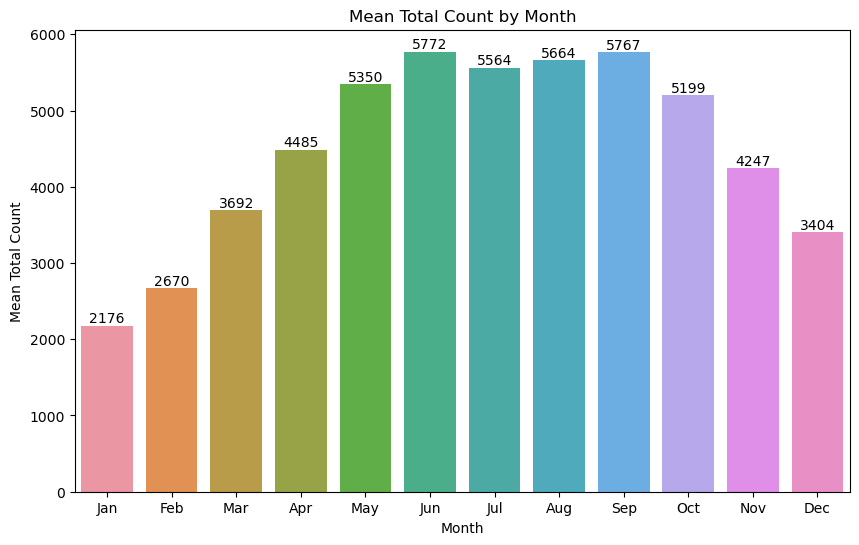

In [344]:
mean_counts = df.groupby("month")["total_count"].mean()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_counts.index, y=mean_counts.values)

x_label = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(range(len(x_label)), x_label, rotation=0)

plt.xlabel("Month")
plt.ylabel("Mean Total Count")
plt.title("Mean Total Count by Month")

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.show()

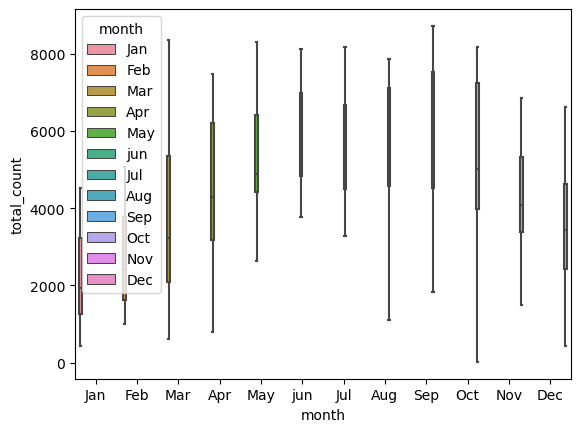

In [345]:
sns.boxplot(data=dataset, x= "month", y="total_count", hue = "month")
plt.show()

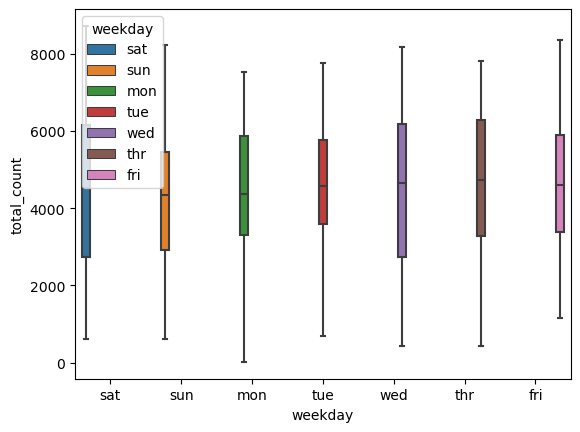

In [346]:
sns.boxplot(data=dataset, x="weekday", y="total_count", hue = "weekday")
plt.show()

## 5. Average Temperature vs Total Rentals

Text(0.5, 1.0, 'Average Temperature vs Total Rentals')

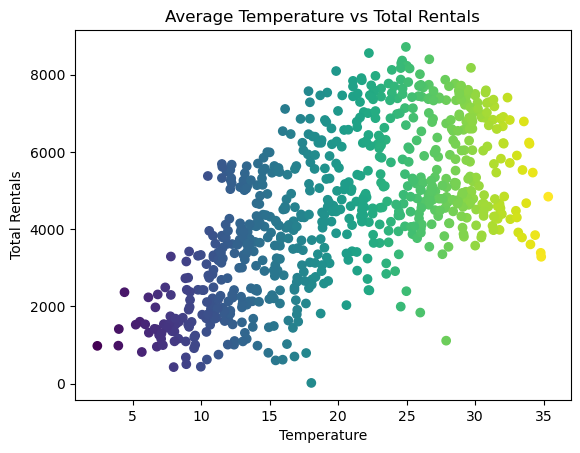

In [347]:
plt.scatter(df['temp'], df['total_count'], c=df['temp'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.title('Average Temperature vs Total Rentals')

## Correlation Heatmap

In [348]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       0 non-null      object 
 3   year         730 non-null    int64  
 4   month        730 non-null    object 
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    object 
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    object 
 9   temp         730 non-null    float64
 10  atemp        730 non-null    float64
 11  humidity     730 non-null    float64
 12  windspeed    730 non-null    float64
 13  total_count  730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


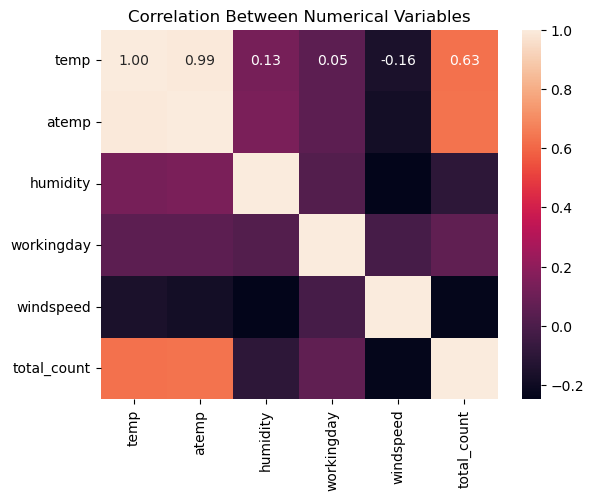

In [349]:
sns.heatmap(dataset[["temp","atemp","humidity","workingday","windspeed","total_count"]].corr(), annot=True, fmt='.2f')
plt.title("Correlation Between Numerical Variables")
plt.show()

## Observation:
There is a very high correlation between temp and atemp. However, using both of these features in our linear regression model may introduce the concept of multicollinearity.

To address this issue, consider the following approaches:

- Feature Selection:
Choose one of the correlated features (temp or atemp) and exclude the other from your model.
Since they provide similar information, using only one of them can help mitigate multicollinearity.
- Feature Engineering:
Create a new feature that combines information from both temp and atemp.
For example, you could calculate the average temperature or the difference between the two.
Regularization Techniques:
If you decide to keep both features, consider using regularization techniques (e.g., Ridge or Lasso regression) to reduce their impact on the model.
- Regularization helps prevent overfitting and handles multicollinearity.

In [350]:
dataset.drop("temp",axis =1 , inplace = True)

<Axes: ylabel='Density'>

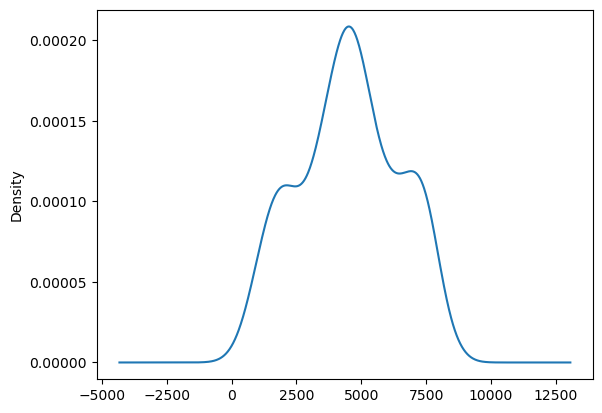

In [351]:
dataset["total_count"].plot.density()

# DATA PREPERATION

Creating dummy variablkes for all the categorical features

In [352]:
# creating dummy variavles for month, weekdays, weathersi and season columns
month_dummy = pd.get_dummies(dataset.month, drop_first = True)
weekday_dummy = pd.get_dummies(dataset.weekday, drop_first=True)
weathersit_dummy= pd.get_dummies(dataset.weathersit, drop_first=True)
season_dummy = pd.get_dummies(dataset.season, drop_first=True)

In [353]:
#converting bool to int
month_dummy = month_dummy.astype(int)
weekday_dummy = weekday_dummy.astype(int)
weathersit_dummy= weathersit_dummy.astype(int)
season_dummy = season_dummy.astype(int)

In [354]:
dataset_new = pd.concat([dataset, month_dummy, weekday_dummy, weathersit_dummy, season_dummy], axis= 1)

In [355]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            730 non-null    int64  
 1   dteday             730 non-null    object 
 2   season             0 non-null      object 
 3   year               730 non-null    int64  
 4   month              730 non-null    object 
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    object 
 7   workingday         730 non-null    int64  
 8   weathersit         730 non-null    object 
 9   atemp              730 non-null    float64
 10  humidity           730 non-null    float64
 11  windspeed          730 non-null    float64
 12  total_count        730 non-null    int64  
 13  Aug                730 non-null    int32  
 14  Dec                730 non-null    int32  
 15  Feb                730 non-null    int32  
 16  Jan                730 non

In [356]:
dataset_new.drop(["instant","dteday","season","weekday","month","weathersit"], axis = 1, inplace =True)

# SPLITTING THE DATA

In [357]:
#specify the random seed
np.random.seed(100)

#usually we form 4 series variable x_train, y_trainm,m x_test and y_test  here I'll use two dataframes for simplicity
dataset_train, dataset_test = train_test_split(dataset_new, train_size=0.7, random_state = 100)

print(f" The dataset_train has {dataset_train.shape[0]} rows and {dataset_train.shape[1]} columns.")
print(f" The dataset_test has {dataset_test.shape[0]} rows and {dataset_test.shape[1]} columns.")

 The dataset_train has 510 rows and 26 columns.
 The dataset_test has 220 rows and 26 columns.


In [358]:
dataset_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,Aug,Dec,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,jun,mon,sat,sun,thr,tue,wed,light snow & rain,misty
576,2019,0,1,33.14,70.42,11.08,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,2019,0,0,20.67,62.12,10.79,4066,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,2019,0,0,11.59,48.33,23.50,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,2019,0,0,18.88,48.96,8.71,4220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,2018,0,1,16.10,72.96,14.71,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [359]:
#rescaling features
scaler = StandardScaler()
num_features = ["atemp","humidity","windspeed"]

#fit_transform
dataset_train[num_features] = scaler.fit_transform(dataset_train[num_features])
dataset_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,total_count,Aug,Dec,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,jun,mon,sat,sun,thr,tue,wed,light snow & rain,misty
576,2019,0,1,1.19,0.52,-0.33,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,2019,0,0,-0.35,-0.07,-0.39,4066,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
728,2019,0,0,-1.47,-1.05,2.02,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,2019,0,0,-0.57,-1.00,-0.78,4220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,2018,0,1,-0.92,0.70,0.35,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


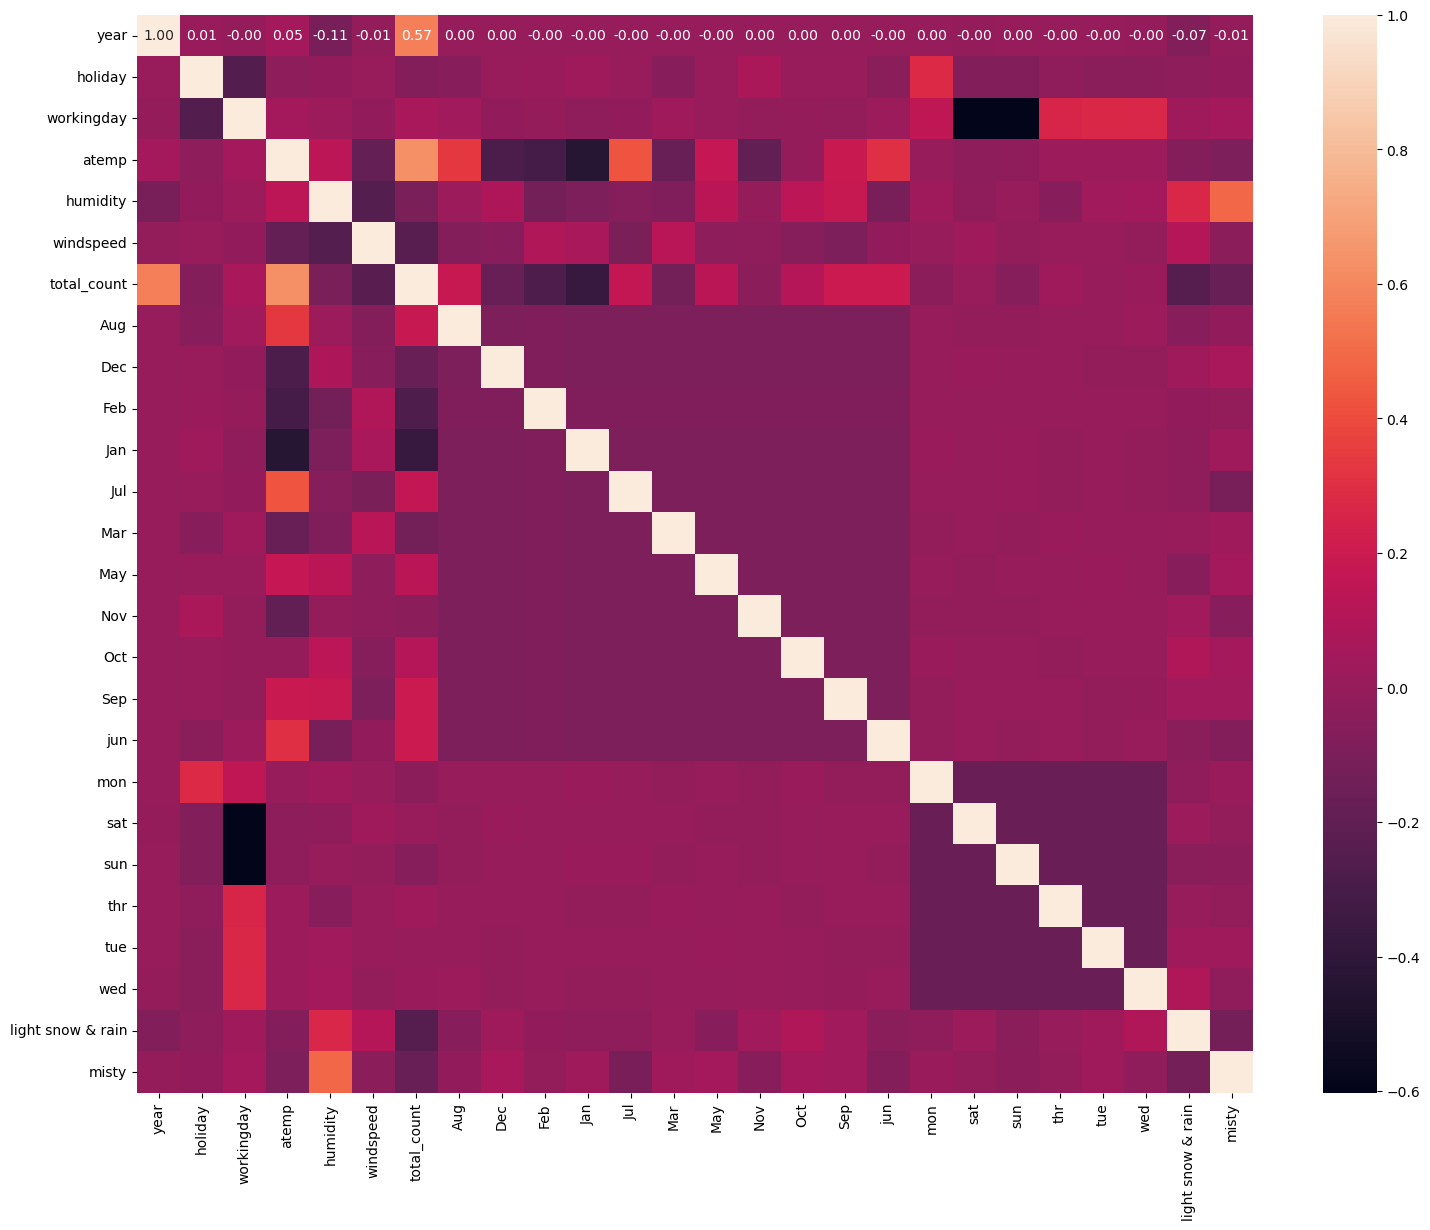

In [360]:
#Heatmap to see which feature is highly correlated
plt.figure(figsize=(18, 14))
sns.heatmap(data=dataset_new.corr(), annot=True, fmt=".2f")
plt.show()

# TRAINING THE MODEL

In [361]:
y_train = dataset_train.pop('total_count')
x_train = dataset_train

## Building 1st model with all variables

### Test on Training Set

In [362]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     102.9
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          4.26e-173
Time:                        20:39:22   Log-Likelihood:                -4126.2
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     485   BIC:                             8408.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.316e+06   1.19e+05    -27.964      0.000   -3.55e+06   -3.08e+06
year               2055.5698     73.423     27.996      0.000    1911.303    2199.837
holiday           -8.294e+05   2.96e+04    -27.986      0.000   -8.88e+05   -7.71e+05
workingday        -8.286e+05   2.96e+04    -27.951      0.000   -8.87e+05    -7.7e+05
atemp               757.2619     86.520      8.752      0.000     587.262     927.262
humidity           -171.4590     51.123     -3.354      0.001    -271.908     -71.010
windspeed          -274.1031     39.654     -6.912      0.000    -352.017    -196.189
Aug                  39.9511    202.730      0.197      0.844    -358.387     438.289
Dec                -314.2855    195.766     -1.605      0.109    -698.941      70.370
Feb               -1110.2880    207.166     -5.359      0.000   -1517.342    -703.234
Jan               -1420.9366    212.226     -6.695      0.000   -1837.932   -1003.941
Jul                -440.5456    225.816     -1.951      0.052    -884.245       3.154
Mar                -495.7302    176.113     -2.815      0.005    -841.769    -149.692
May                 291.0243    189.677      1.534      0.126     -81.666     663.714
Nov                 167.6751    186.332      0.900      0.369    -198.443     533.793
Oct                 615.9467    184.199      3.344      0.001     254.020     977.874
Sep                 696.3106    196.731      3.539      0.000     309.760    1082.861
jun                  95.0236    208.078      0.457      0.648    -313.822     503.870
mon                -185.8884    140.007     -1.328      0.185    -460.984      89.207
sat               -8.286e+05   2.96e+04    -27.953      0.000   -8.87e+05    -7.7e+05
sun               -8.291e+05   2.96e+04    -27.966      0.000   -8.87e+05   -7.71e+05
thr                -120.5570    142.182     -0.848      0.397    -399.927     158.813
tue                -160.9942    141.838     -1.135      0.257    -439.687     117.698
wed                 -69.9478    136.415     -0.513      0.608    -337.985     198.089
light snow & rain -2183.5135    241.288     -9.049      0.000   -2657.613   -1709.414
misty              -518.5430     95.172     -5.448      0.000    -705.543    -331.543
==============================================================================
Omnibus:                       73.567   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.530
Skew:                          -0.736   Prob(JB):                     8.51e-41
Kurtosis:                       5.553   Cond. No.                     2.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

### Checking its VIF

In [363]:
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,"11,556,204.02"
18,sat,"2,646,161.94"
19,sun,"2,445,305.52"
1,holiday,"435,403.55"
3,atemp,5.82
9,Jan,2.82
10,Jul,2.80
6,Aug,2.78
16,jun,2.38
7,Dec,2.30


## 2ND MODEL

In [364]:
#dropping the"workingday" column although it's P>|t| is 0.00 but it is shure introducing a lot of multicolinearity
x = x_train.drop("workingday", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     102.9
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          4.26e-173
Time:                        20:39:23   Log-Likelihood:                -4126.2
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     485   BIC:                             8408.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.144e+06   1.48e+05    -27.962      0.000   -4.44e+06   -3.85e+06
year               2055.5698     73.423     27.996      0.000    1911.303    2199.837
holiday            -808.7788    242.275     -3.338      0.001   -1284.817    -332.741
atemp               757.2619     86.520      8.752      0.000     587.262     927.262
humidity           -171.4590     51.123     -3.354      0.001    -271.908     -71.010
windspeed          -274.1031     39.654     -6.912      0.000    -352.017    -196.189
Aug                  39.9511    202.730      0.197      0.844    -358.387     438.289
Dec                -314.2855    195.766     -1.605      0.109    -698.941      70.370
Feb               -1110.2880    207.166     -5.359      0.000   -1517.342    -703.234
Jan               -1420.9366    212.226     -6.695      0.000   -1837.932   -1003.941
Jul                -440.5456    225.816     -1.951      0.052    -884.245       3.154
Mar                -495.7302    176.113     -2.815      0.005    -841.769    -149.692
May                 291.0243    189.677      1.534      0.126     -81.666     663.714
Nov                 167.6751    186.332      0.900      0.369    -198.443     533.793
Oct                 615.9467    184.199      3.344      0.001     254.020     977.874
Sep                 696.3106    196.731      3.539      0.000     309.760    1082.861
jun                  95.0236    208.078      0.457      0.648    -313.822     503.870
mon                -185.8884    140.007     -1.328      0.185    -460.984      89.207
sat                 -19.2660    136.437     -0.141      0.888    -287.347     248.815
sun                -510.9718    139.649     -3.659      0.000    -785.364    -236.579
thr                -120.5570    142.182     -0.848      0.397    -399.927     158.813
tue                -160.9942    141.838     -1.135      0.257    -439.687     117.698
wed                 -69.9478    136.415     -0.513      0.608    -337.985     198.089
light snow & rain -2183.5135    241.288     -9.049      0.000   -2657.613   -1709.414
misty              -518.5430     95.172     -5.448      0.000    -705.543    -331.543
==============================================================================
Omnibus:                       73.567   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.530
Skew:                          -0.736   Prob(JB):                     8.51e-41
Kurtosis:                       5.553   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinear

In [365]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,22.23
2,atemp,5.69
8,Jan,3.08
5,Aug,3.06
9,Jul,3.00
15,jun,2.55
6,Dec,2.51
23,misty,2.42
14,Sep,2.41
10,Mar,2.36


## 3RD MODEL

In [366]:
#dropping the"Oct" column due to high P>|t| and VIF values

x = x.drop("Oct", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     104.6
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          9.86e-172
Time:                        20:39:24   Log-Likelihood:                -4132.0
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     486   BIC:                             8414.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.127e+06    1.5e+05    -27.574      0.000   -4.42e+06   -3.83e+06
year               2047.1608     74.145     27.610      0.000    1901.477    2192.845
holiday            -806.0456    244.798     -3.293      0.001   -1287.039    -325.052
atemp               760.0341     87.418      8.694      0.000     588.271     931.797
humidity           -144.7038     51.019     -2.836      0.005    -244.948     -44.459
windspeed          -287.3793     39.865     -7.209      0.000    -365.709    -209.049
Aug                -288.1364    179.255     -1.607      0.109    -640.347      64.074
Dec                -639.2134    171.720     -3.722      0.000    -976.618    -301.809
Feb               -1407.5267    189.077     -7.444      0.000   -1779.036   -1036.017
Jan               -1726.8151    193.496     -8.924      0.000   -2107.008   -1346.623
Jul                -766.2148    205.858     -3.722      0.000   -1170.696    -361.733
Mar                -798.6043    152.610     -5.233      0.000   -1098.462    -498.747
May                 -39.4996    163.574     -0.241      0.809    -360.899     281.899
Nov                -150.8868    161.806     -0.933      0.352    -468.813     167.040
Sep                 357.4689    170.385      2.098      0.036      22.687     692.251
jun                -220.6356    187.366     -1.178      0.240    -588.783     147.511
mon                -187.7817    141.465     -1.327      0.185    -465.740      90.177
sat                 -15.9100    137.855     -0.115      0.908    -286.776     254.956
sun                -504.5165    141.091     -3.576      0.000    -781.741    -227.292
thr                -127.7893    143.647     -0.890      0.374    -410.036     154.457
tue                -169.7397    143.291     -1.185      0.237    -451.287     111.808
wed                 -78.4300    137.812     -0.569      0.570    -349.212     192.352
light snow & rain -2141.5469    243.473     -8.796      0.000   -2619.936   -1663.158
misty              -538.2703     95.979     -5.608      0.000    -726.855    -349.686
==============================================================================
Omnibus:                       56.216   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.973
Skew:                          -0.631   Prob(JB):                     6.56e-26
Kurtosis:                       4.966   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [367]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,14.81
2,atemp,5.69
8,Jan,2.51
9,Jul,2.45
22,misty,2.41
5,Aug,2.34
15,mon,2.30
20,wed,2.30
16,sat,2.24
17,sun,2.17


## 4TH MODEL

In [368]:

x = x.drop("Mar", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          5.20e-167
Time:                        20:39:24   Log-Likelihood:                -4146.0
No. Observations:                 510   AIC:                             8338.
Df Residuals:                     487   BIC:                             8435.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.118e+06   1.54e+05    -26.799      0.000   -4.42e+06   -3.82e+06
year               2042.4988     76.121     26.832      0.000    1892.932    2192.065
holiday            -770.3338    251.244     -3.066      0.002   -1263.990    -276.677
atemp               869.4140     87.151      9.976      0.000     698.176    1040.652
humidity           -139.1930     52.371     -2.658      0.008    -242.095     -36.291
windspeed          -287.8339     40.931     -7.032      0.000    -368.257    -207.411
Aug                -130.3349    181.424     -0.718      0.473    -486.805     226.135
Dec                -270.2154    160.759     -1.681      0.093    -586.083      45.652
Feb               -1011.6260    177.913     -5.686      0.000   -1361.198    -662.054
Jan               -1291.1968    179.343     -7.200      0.000   -1643.579    -938.814
Jul                -646.1639    210.044     -3.076      0.002   -1058.869    -233.459
May                 176.4699    162.513      1.086      0.278    -142.843     495.782
Nov                 188.1403    152.233      1.236      0.217    -110.975     487.255
Sep                 553.7928    170.646      3.245      0.001     218.500     889.086
jun                 -52.2290    189.515     -0.276      0.783    -424.598     320.140
mon                -186.9688    145.246     -1.287      0.199    -472.356      98.418
sat                 -22.5190    141.534     -0.159      0.874    -300.612     255.574
sun                -481.0428    144.789     -3.322      0.001    -765.532    -196.554
thr                -172.9566    147.221     -1.175      0.241    -462.223     116.310
tue                -173.7331    147.120     -1.181      0.238    -462.801     115.335
wed                 -93.6967    141.465     -0.662      0.508    -371.653     184.260
light snow & rain -2072.4561    249.613     -8.303      0.000   -2562.907   -1582.005
misty              -534.7106     98.542     -5.426      0.000    -728.330    -341.091
==============================================================================
Omnibus:                       37.277   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.270
Skew:                          -0.535   Prob(JB):                     6.04e-13
Kurtosis:                       4.227   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,12.75
2,atemp,5.36
9,Jul,2.41
21,misty,2.41
19,wed,2.30
14,mon,2.30
5,Aug,2.28
15,sat,2.24
16,sun,2.17
17,thr,2.09


## 5TH MODEL

In [370]:

x = x.drop("sat", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     107.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          5.01e-168
Time:                        20:39:24   Log-Likelihood:                -4146.0
No. Observations:                 510   AIC:                             8336.
Df Residuals:                     488   BIC:                             8429.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.118e+06   1.53e+05    -26.828      0.000   -4.42e+06   -3.82e+06
year               2042.6026     76.042     26.861      0.000    1893.192    2192.014
holiday            -769.0692    250.868     -3.066      0.002   -1261.983    -276.155
atemp               869.5138     87.062      9.987      0.000     698.452    1040.576
humidity           -139.2634     52.317     -2.662      0.008    -242.058     -36.469
windspeed          -288.0689     40.863     -7.050      0.000    -368.359    -207.779
Aug                -130.1567    181.239     -0.718      0.473    -486.262     225.948
Dec                -270.5506    160.585     -1.685      0.093    -586.074      44.972
Feb               -1010.7902    177.658     -5.690      0.000   -1359.859    -661.721
Jan               -1291.3175    179.163     -7.208      0.000   -1643.343    -939.292
Jul                -645.8589    209.826     -3.078      0.002   -1058.132    -233.586
May                 177.1519    162.294      1.092      0.276    -141.729     496.033
Nov                 187.6601    152.051      1.234      0.218    -111.096     486.416
Sep                 553.6671    170.474      3.248      0.001     218.714     888.620
jun                 -52.5706    189.314     -0.278      0.781    -424.541     319.400
mon                -174.7203    123.044     -1.420      0.156    -416.482      67.041
sun                -468.6420    121.900     -3.844      0.000    -708.155    -229.129
thr                -160.4923    124.523     -1.289      0.198    -405.160      84.175
tue                -161.4587    125.145     -1.290      0.198    -407.349      84.432
wed                 -81.2683    117.825     -0.690      0.491    -312.775     150.238
light snow & rain -2073.9763    249.181     -8.323      0.000   -2563.576   -1584.376
misty              -534.0584     98.358     -5.430      0.000    -727.316    -340.801
==============================================================================
Omnibus:                       37.527   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.705
Skew:                          -0.537   Prob(JB):                     4.86e-13
Kurtosis:                       4.231   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [371]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,8.21
2,atemp,5.36
9,Jul,2.41
20,misty,2.41
5,Aug,2.28
8,Jan,2.04
13,jun,1.97
3,humidity,1.95
12,Sep,1.69
14,mon,1.65


## 6TH MODEL

In [372]:
x = x.drop("wed", axis = 1)

#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          5.88e-169
Time:                        20:39:25   Log-Likelihood:                -4146.3
No. Observations:                 510   AIC:                             8335.
Df Residuals:                     489   BIC:                             8423.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.116e+06   1.53e+05    -26.834      0.000   -4.42e+06   -3.81e+06
year               2041.4979     75.985     26.867      0.000    1892.201    2190.795
holiday            -765.9813    250.693     -3.055      0.002   -1258.550    -273.413
atemp               867.6261     86.972      9.976      0.000     696.741    1038.511
humidity           -140.6787     52.249     -2.692      0.007    -243.339     -38.019
windspeed          -287.5634     40.835     -7.042      0.000    -367.797    -207.330
Aug                -126.9077    181.081     -0.701      0.484    -482.700     228.884
Dec                -267.9706    160.455     -1.670      0.096    -583.237      47.296
Feb               -1013.9476    177.504     -5.712      0.000   -1362.712    -665.183
Jan               -1294.1489    179.019     -7.229      0.000   -1645.891    -942.407
Jul                -639.1017    209.484     -3.051      0.002   -1050.702    -227.501
May                 174.0619    162.145      1.073      0.284    -144.525     492.649
Nov                 184.0948    151.882      1.212      0.226    -114.327     482.516
Sep                 553.4044    170.382      3.248      0.001     218.634     888.175
jun                 -54.0670    189.200     -0.286      0.775    -425.812     317.678
mon                -145.5889    115.506     -1.260      0.208    -372.539      81.361
sun                -439.1852    114.112     -3.849      0.000    -663.396    -214.974
thr                -130.8664    116.818     -1.120      0.263    -360.393      98.660
tue                -131.9398    117.537     -1.123      0.262    -362.880      99.000
light snow & rain -2083.5511    248.660     -8.379      0.000   -2572.126   -1594.976
misty              -530.9797     98.204     -5.407      0.000    -723.934    -338.026
==============================================================================
Omnibus:                       35.343   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.290
Skew:                          -0.512   Prob(JB):                     2.68e-12
Kurtosis:                       4.207   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,6.83
2,atemp,5.35
9,Jul,2.41
19,misty,2.40
5,Aug,2.27
8,Jan,2.04
13,jun,1.97
3,humidity,1.95
12,Sep,1.69
10,May,1.60


## 7TH MODEL

In [374]:
#creating new model on "x"
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          5.88e-169
Time:                        20:39:25   Log-Likelihood:                -4146.3
No. Observations:                 510   AIC:                             8335.
Df Residuals:                     489   BIC:                             8423.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.116e+06   1.53e+05    -26.834      0.000   -4.42e+06   -3.81e+06
year               2041.4979     75.985     26.867      0.000    1892.201    2190.795
holiday            -765.9813    250.693     -3.055      0.002   -1258.550    -273.413
atemp               867.6261     86.972      9.976      0.000     696.741    1038.511
humidity           -140.6787     52.249     -2.692      0.007    -243.339     -38.019
windspeed          -287.5634     40.835     -7.042      0.000    -367.797    -207.330
Aug                -126.9077    181.081     -0.701      0.484    -482.700     228.884
Dec                -267.9706    160.455     -1.670      0.096    -583.237      47.296
Feb               -1013.9476    177.504     -5.712      0.000   -1362.712    -665.183
Jan               -1294.1489    179.019     -7.229      0.000   -1645.891    -942.407
Jul                -639.1017    209.484     -3.051      0.002   -1050.702    -227.501
May                 174.0619    162.145      1.073      0.284    -144.525     492.649
Nov                 184.0948    151.882      1.212      0.226    -114.327     482.516
Sep                 553.4044    170.382      3.248      0.001     218.634     888.175
jun                 -54.0670    189.200     -0.286      0.775    -425.812     317.678
mon                -145.5889    115.506     -1.260      0.208    -372.539      81.361
sun                -439.1852    114.112     -3.849      0.000    -663.396    -214.974
thr                -130.8664    116.818     -1.120      0.263    -360.393      98.660
tue                -131.9398    117.537     -1.123      0.262    -362.880      99.000
light snow & rain -2083.5511    248.660     -8.379      0.000   -2572.126   -1594.976
misty              -530.9797     98.204     -5.407      0.000    -723.934    -338.026
==============================================================================
Omnibus:                       35.343   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.290
Skew:                          -0.512   Prob(JB):                     2.68e-12
Kurtosis:                       4.207   Cond. No.                     8.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [375]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,year,6.83
2,atemp,5.35
9,Jul,2.41
19,misty,2.40
5,Aug,2.27
8,Jan,2.04
13,jun,1.97
3,humidity,1.95
12,Sep,1.69
10,May,1.60


# TESTING THE OUTPUT - RESIDUAL ANALYSIS

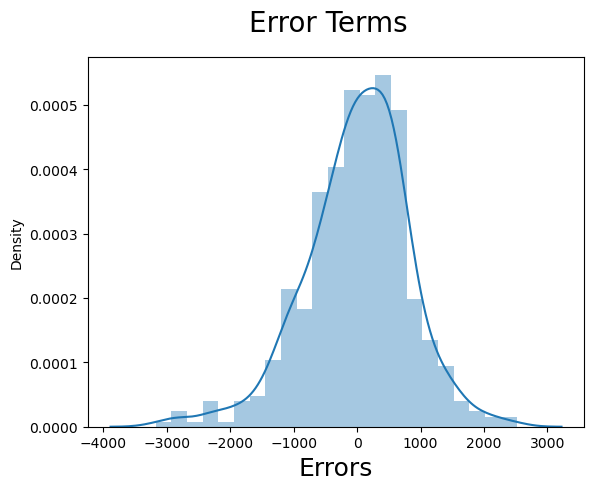

In [376]:
# Residual analysis
y_train_pred = lr_model.predict(x_train_sm)
res = y_train - y_train_pred

# plot the residual
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## OBSERVATION - ERROR TERMS
Errors terms are normally distributed which indicate that the model's assumptions are met

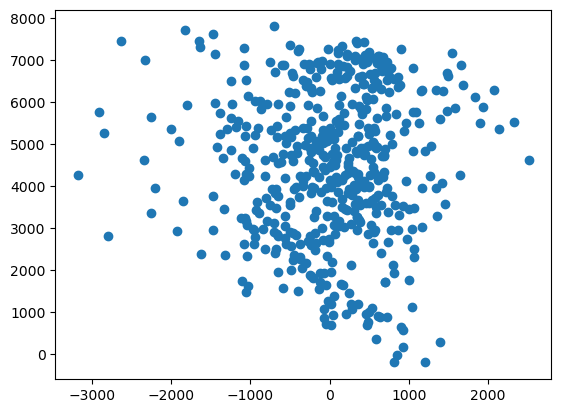

In [377]:
# Homoscedasticity
plt.scatter(res, y_train_pred)
plt.show()

## OBSERVATION - ERROR TERMS
There is no pattern observed in the above graph, hence Homoscedasticity assumption is satisfied

#PREDICTIONG AND EVALUATION

In [378]:
# Rescaling on numeric variables for Test set
num_vars = ['atemp', 'humidity', 'windspeed']

# Fit the scaler on data
dataset_test[num_vars] = scaler.transform(dataset_test[num_vars])

# Behold the transformed dataset
dataset_test.head()


,year,holiday,workingday,atemp,humidity,windspeed,total_count,Aug,Dec,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,jun,mon,sat,sun,thr,tue,wed,light snow & rain,misty
184,2018,1,0,1.21,0.05,-1.40,6043,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,2019,0,1,1.55,-0.28,-0.99,6211,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
299,2018,0,1,-0.08,1.28,0.08,2659,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
221,2018,0,1,1.33,-1.46,0.11,4780,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,2018,0,1,1.08,-2.31,1.28,4968,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [379]:
# Unleashing the power of separation
y_test = dataset_test.pop("total_count")
x_test = dataset_test


In [380]:
dataset_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,Aug,Dec,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,jun,mon,sat,sun,thr,tue,wed,light snow & rain,misty
184,2018,1,0,1.21,0.05,-1.40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,2019,0,1,1.55,-0.28,-0.99,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
299,2018,0,1,-0.08,1.28,0.08,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
221,2018,0,1,1.33,-1.46,0.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,2018,0,1,1.08,-2.31,1.28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [381]:
# Adding a constant term to our test set
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()


,const,year,holiday,workingday,atemp,humidity,windspeed,Aug,Dec,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,jun,mon,sat,sun,thr,tue,wed,light snow & rain,misty
184,1.00,2018,1,0,1.21,0.05,-1.40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1.00,2019,0,1,1.55,-0.28,-0.99,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
299,1.00,2018,0,1,-0.08,1.28,0.08,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
221,1.00,2018,0,1,1.33,-1.46,0.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,1.00,2018,0,1,1.08,-2.31,1.28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [383]:
# dropping the features which were not in the final model
x_test_sm.drop(["workingday","Oct","Mar","sat","wed"], axis=1, inplace=True)
x_test_sm.head()

,const,year,holiday,atemp,humidity,windspeed,Aug,Dec,Feb,Jan,Jul,May,Nov,Sep,jun,mon,sun,thr,tue,light snow & rain,misty
184,1.00,2018,1,1.21,0.05,-1.40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
535,1.00,2019,0,1.55,-0.28,-0.99,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,1.00,2018,0,-0.08,1.28,0.08,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
221,1.00,2018,0,1.33,-1.46,0.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,1.00,2018,0,1.08,-2.31,1.28,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
#prediciting the model
y_test_pred = lr_model.predict(x_test_sm)

In [ ]:
#evaluating
r2_score(y_true= y_test, y_pred=y_test_pred)

0.7833723461522906

# Conclusions
- The Linear Regresison model was able to predict bike renting demand precisely with an R2 Score of 78.34%